<img src="./img/logo_UTN.svg" align="right" width="300" />

# Trabajo Semanal 3 - Teoría de Circuitos 2
### Autor: Santiago Palozzo
  
<img src="./img/plantilla.png" align="center" width="300" />

# 1. Desarrollo en papel

Descripcion del TP

In [1]:
from IPython.display import IFrame
IFrame("./desarrollo.pdf", width=800, height=800)

# 2. Simulacion numérica en Python

In [2]:
#%% Inicializacion de librerias
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

In [3]:
#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías

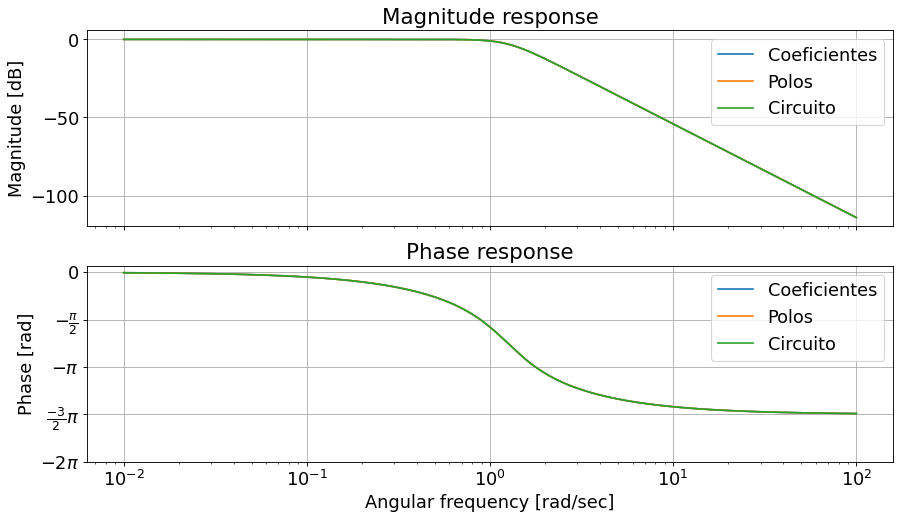

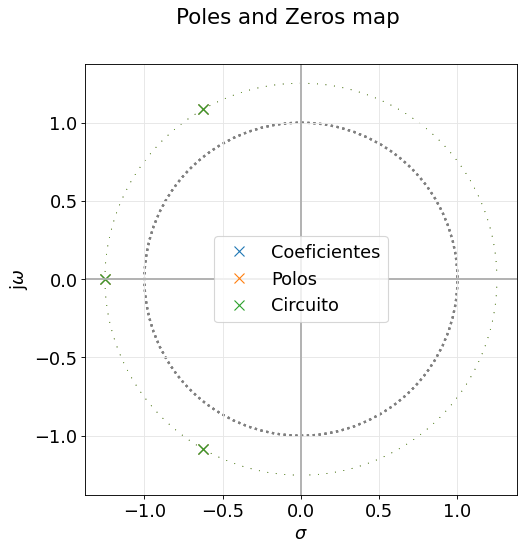

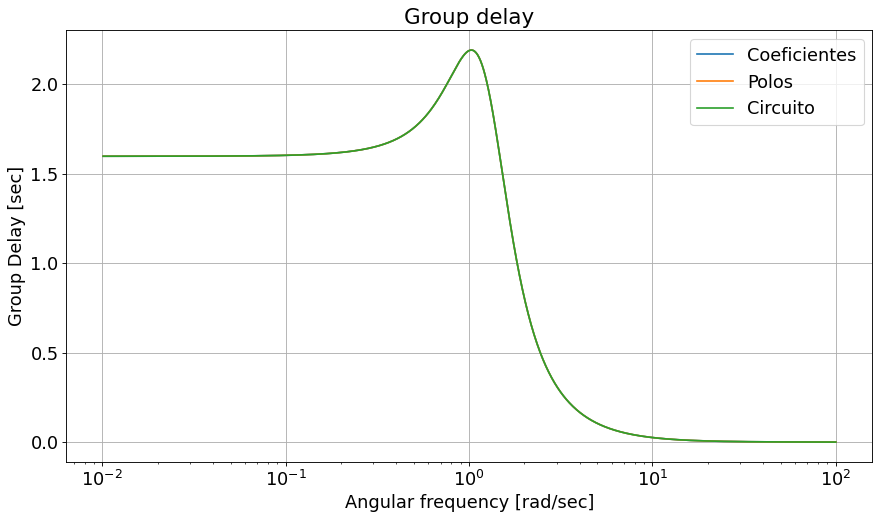

In [4]:
#%% Defino los parametros
alfa_max= 1     #[dB]
alfa_min= 12    #[dB]
wp= 1500    #[Hz]
ws= 3000    #[Hz]
wn= wp      #Norma de frecuencia
e2= 10**(alfa_max/10)-1 #epsilon**2
e = np.sqrt(e2);        #epsilon 
n = 3 #grado del filtro

#%% Defino los componentes del circuito
w0= np.power((e2**-1), 1/6) #modulo de los polos (radio de la circunferencia)
#w0= 1

qq= 1
norma_r= 1; norma_w= w0;

r1= norma_r
c1= 1/(norma_r * norma_w)
r2= norma_r
l2= (qq * norma_r)/norma_w
c2= 1/(qq * norma_r * norma_w)

#%% Defino las transferencias

# TF hallada despejando coeficientes a, b y c
my_tf_coef = TransferFunction( [e**(-1)], [1, 2*e**(-1/3), 2*e**(-2/3), e**(-1)] )

# TF hallada a partir del mapa de polos y ceros
my_tf_pz = TransferFunction( [w0**3], [1, 2*w0, 2*w0**2, w0**3] )

# TF hallada a partir del circuito implementado
tf_circ_num1er= [1/(r1*c1)]
tf_circ_den1er= [1, 1/(r1*c1)]

tf_circ_num2do= [1/(l2*c2)]
tf_circ_den2do= [1, r2/l2, 1/(l2*c2)]

my_tf_circ = TransferFunction( np.polymul(tf_circ_num1er, tf_circ_num2do), 
                              np.polymul(tf_circ_den1er, tf_circ_den2do))
#%% Gráficos
plt.close('all')

my_tf_array= [my_tf_coef, my_tf_pz, my_tf_circ]
my_tf_descriptions= ["Coeficientes", "Polos", "Circuito"]

for tf_2plot in range(len(my_tf_array)):
    bodePlot(my_tf_array[tf_2plot], fig_id=1, filter_description = my_tf_descriptions[tf_2plot])
    pzmap(my_tf_array[tf_2plot], fig_id=2, filter_description = my_tf_descriptions[tf_2plot]) #S plane pole/zero plot
    GroupDelay(my_tf_array[tf_2plot], fig_id=3, filter_description = my_tf_descriptions[tf_2plot])

### Si los calculos son correctos, todos los graficos se solapan.

***
En los graficos se puede observar como los 3 distintos metodos de expresar la transferencia conducen a la misma respuesta en frecuencia del filtro.  
  
  ## Caso en que los capacitores valen 100nF
  
  En este caso, redefino la norma de impedancia pasando de $R$ al valor de los capacitores. Esto redefine las parametrizaciones de los componentes como se puede ver en el siguiente script. Se normalizó segun $C$ y luego se reemplazo $C= 100nF$ para utilizar los componentes requeridos.

In [5]:
#%% Redefino la norma de impedancia en el caso de usar C=100nF
norma_c= 100*10**(-9); #100nF
cond_capacitores= True

if cond_capacitores==True:
    r1= 1/(norma_c * norma_w)
    c1= norma_c
    r2= 1/(qq * norma_c * norma_w)
    l2= 1/(w0**2 * norma_c)
    c2= norma_c

De esta manera los componentes dependen del valor que se le de a los capacitores, manteniendo la misma respuesta que en el caso anterior cuando la norma eran las resistencias.

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

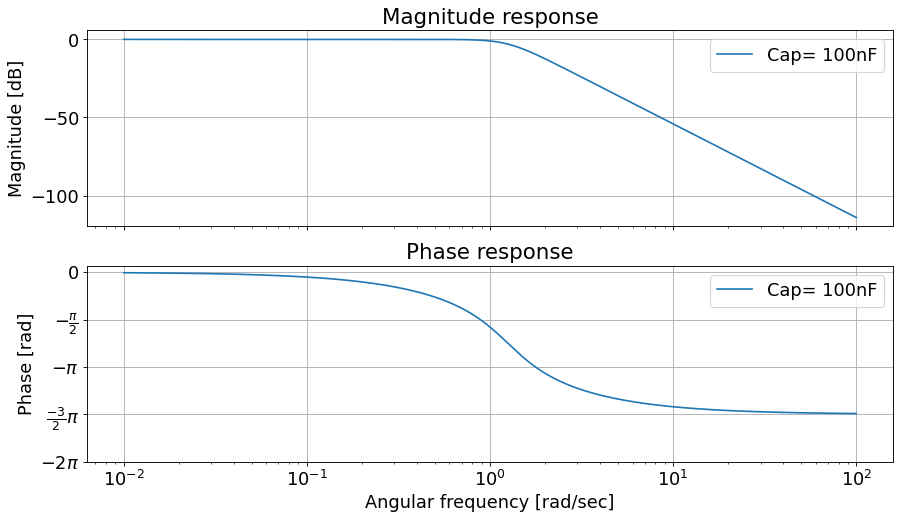

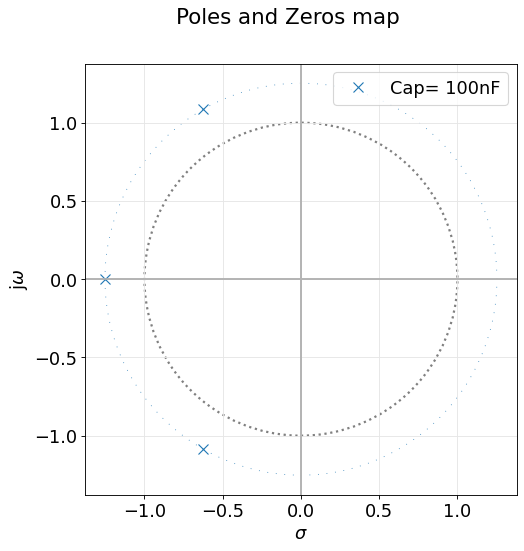

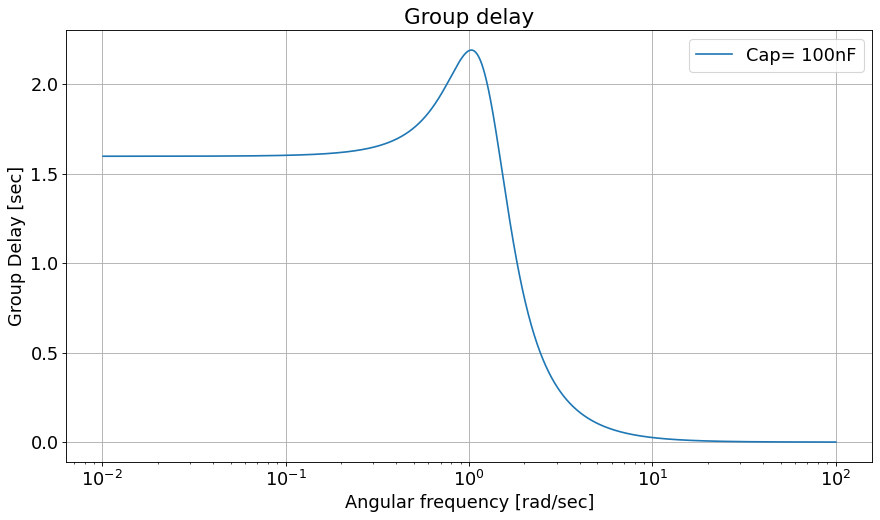

In [6]:
bodePlot(my_tf_circ, fig_id=1, filter_description = "Cap= 100nF")
pzmap(my_tf_circ, fig_id=2, filter_description = "Cap= 100nF") #S plane pole/zero plot
GroupDelay(my_tf_circ, fig_id=3, filter_description = "Cap= 100nF")

# 3. Planteo de la renormalización de Butterworth

Para las simulaciones circuitales en LTspice se utilizo la renormalizacion por $\omega_{Butter}$. Esto permite diseñar filtros mediante la aproximacion de maxima planicidad como si todos fueran del tipo Butterworth, es decir $\xi^2= 1$

<img src="./img/omega_butter.jpg" align="center" width="500" />

# 4. Circuito normalizado y simulación en LTspice

La implementación del filtro se realizó mediante la cascada de un filtro de segundo orden detrás de uno de primer orden, separados por un seguidor de tensión (buffer). El circuito se encuentra normalizado a $\Omega_\omega = \omega_p = 3000\pi \frac{rad}{s}$

Es importante notar que la simulacion se realizo de tal forma que en el eje X de LTspice $1 Hz$ coincide con lo que sería $1 \frac{rad}{s}$

<img src="./img/circuito_spice_con_bobina.png" align="center" width="900" />

<img src="./img/simulacion_normalizado_con_bobina.png" align="center" width="900" />

En el grafico se observa como en $\omega= 1$ decae aproximadamente 1dB, mientras que en $\omega= 2$ la atenuacion es de 12.5 dB, cumpliendo con la restricción de la plantilla. 

# 5. Activación del filtro y simulación circuital

Para activar el circuito diseñado previamente se opto por un filtro pasabajos multiple feedback, el cual permite la implementacion de la misma funcion de filtrado (acompañado por el filtro de primer orden) evitando el uso de bobinas en el circuito.

- Desarrollo en papel

<img src="./img/desarrollo_MFB.jpg" align="center" width="500" />

En este circuito aparecen nuevas resistencias y un capacitor más. Esta configuración genera que cambien las parametrizaciones de los componentes para adecuarse a la nueva topología.

- Simulacion en LTspice
 
<img src="./img/circuito_spice_MFB.png" align="center" width="900" />

<img src="./img/simulacion_normalizado_MFB.png" align="center" width="900" />

Se puede observar como la simulación se mantuvo sin cambios, por lo que la implementación resultó correcta. 